Objetivo: Descobrir qual a taxa de evasão de cada curso (ECA, SI) por ano de matricula.

Etapas:
- importar os dados
- descobrir o ano de ingresso atráves da matricula
- tratar a situação da matricula para evasão ou não evasão
- utilizar função para garantir que exista apenas um registro (tupla) de cada aluno
- com a situação da matricula e o ano de ingresso, realizar operação para identificar a taxa de evasão

In [73]:
import pandas as pd

%matplotlib inline


#dados = pd.read_csv('si-original.csv', na_values=['NULL'], dtype={"MATRICULA" : "object"})
dados = pd.read_csv('eca-original.csv', na_values=['NULL'], dtype={"MATRICULA" : "object"})

#dados.dtypes

In [74]:
dados.shape

(20770, 27)

In [75]:
#CRIANDO CAMPO DE ANO DE INGRESSO PARA CÁLCULO DA IDADE DE INGRESSO
dados['ANO_INGRESSO'] = dados['MATRICULA'].str[:4]

In [76]:
# Verificando valores existentes na coluna de situação da matricula

dados['SIT_MATRICULA'].unique()

array([ 0,  9, 10, 11,  2,  4, 20, 14, 18, 13], dtype=int64)

In [77]:
# categoria 0 = Matriculado
# categoria 2 = Trancado
# categoria 4 = Transferido interno
# categoria 9 = Evasão
# categoria 10 = Cancelado
# categoria 11 = Transferido Externo
# categoria 13 = Aguardando colação de grau
# categoria 14 = Intercambio
# categoria 18 = Formado
# categoria 20 = Cancelamento compulsorio

# evasão = 2, 4, 9, 10, 11, 20
# não evasão = 0, 13, 14, 18

# 0 = não evasão,  1 = evasão

dados.loc[dados['SIT_MATRICULA']==13,'SIT_MATRICULA'] = 0
dados.loc[dados['SIT_MATRICULA']==14,'SIT_MATRICULA'] = 0
dados.loc[dados['SIT_MATRICULA']==18,'SIT_MATRICULA'] = 0
dados.loc[dados['SIT_MATRICULA']==2,'SIT_MATRICULA'] = 1
dados.loc[dados['SIT_MATRICULA']==4,'SIT_MATRICULA'] = 1
dados.loc[dados['SIT_MATRICULA']==9,'SIT_MATRICULA'] = 1
dados.loc[dados['SIT_MATRICULA']==10,'SIT_MATRICULA'] = 1
dados.loc[dados['SIT_MATRICULA']==11,'SIT_MATRICULA'] = 1
dados.loc[dados['SIT_MATRICULA']==20,'SIT_MATRICULA'] = 1

dados['SIT_MATRICULA'].unique()

array([0, 1], dtype=int64)

In [78]:
# utilizar função para garantir que exista apenas um registro (tupla) de cada aluno 

dados = dados.drop_duplicates(subset='MATRICULA', keep='first')

dados.shape

(570, 28)

In [79]:
# total de alunos por ano
colunas = ['ano', 'Quantidade de alunos', 'Quantidade de evasão', 'Taxa de evasão (%)']
evasao = pd.DataFrame(columns=colunas)

print('Taxa de evasão do curso de Engenharia de Controle e Automação por ano.')

for ano in dados.ANO_INGRESSO.unique():
    # identificar quantidade de alunos por ano
    total_alunos_ano = dados.loc[dados['ANO_INGRESSO']==ano, 'ANO_INGRESSO'].count()
    #print('Ano:' + str(ano) + ', quantidade de alunos: ' + str(total_alunos_ano))
    
    # identificar quantidade de evasão por ano
    evasao_ano = dados.loc[(dados['ANO_INGRESSO']==ano) & (dados['SIT_MATRICULA']==1), 'ANO_INGRESSO'].count()
    #print('Quantidade de alunos classificados como evasão: ', evasao_ano)
    
    taxa_evasao = evasao_ano / total_alunos_ano * 100
    
    #print('Taxa de evasão: ' + str(taxa_evasao) + '%')
    
    print('Ano:' + str(ano) + ', quantidade de alunos: ' + str(total_alunos_ano) + ', quantidade evasão: ' + str(evasao_ano) + ', taxa de evasão: ' + str(round(taxa_evasao,2)) + '%')
    
    evasao = evasao.append(pd.DataFrame([[ano, total_alunos_ano, evasao_ano, taxa_evasao]], columns=colunas))



Taxa de evasão do curso de Engenharia de Controle e Automação por ano.
Ano:2016, quantidade de alunos: 11, quantidade evasão: 0, taxa de evasão: 0.0%
Ano:2015, quantidade de alunos: 53, quantidade evasão: 9, taxa de evasão: 16.98%
Ano:2014, quantidade de alunos: 64, quantidade evasão: 31, taxa de evasão: 48.44%
Ano:2013, quantidade de alunos: 83, quantidade evasão: 42, taxa de evasão: 50.6%
Ano:2012, quantidade de alunos: 92, quantidade evasão: 40, taxa de evasão: 43.48%
Ano:2011, quantidade de alunos: 72, quantidade evasão: 40, taxa de evasão: 55.56%
Ano:2010, quantidade de alunos: 67, quantidade evasão: 35, taxa de evasão: 52.24%
Ano:2009, quantidade de alunos: 65, quantidade evasão: 51, taxa de evasão: 78.46%
Ano:2008, quantidade de alunos: 63, quantidade evasão: 36, taxa de evasão: 57.14%


In [80]:
evasao

,ano,Quantidade de alunos,Quantidade de evasão,Taxa de evasão (%)
0,2016,11.0,0.0,0.000000
0,2015,53.0,9.0,16.981132
0,2014,64.0,31.0,48.437500
0,2013,83.0,42.0,50.602410
0,2012,92.0,40.0,43.478261
0,2011,72.0,40.0,55.555556
0,2010,67.0,35.0,52.238806
0,2009,65.0,51.0,78.461538
0,2008,63.0,36.0,57.142857


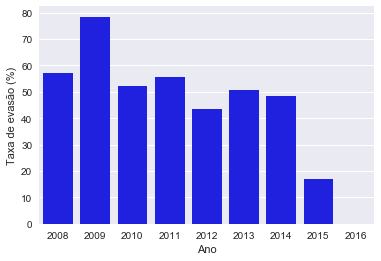

In [81]:
import matplotlib.pyplot as plt
import seaborn as sb


sb.barplot(x='ano', y='Taxa de evasão (%)', data=evasao, color='b')

plt.ylabel('Taxa de evasão (%)')
plt.xlabel('Ano')
plt.show()

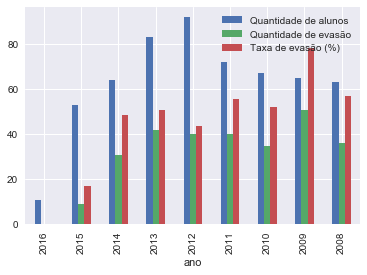

In [82]:
evasao.plot(x=evasao.ano, kind='bar')